# 导论

机器学习的一个重要的目标就是利用数学模型来理解数据，发现数据中的规律，用作数据的分析和预测。数据通常由一组向量组成，这组向量中的每个向量都是一个样本，我们用$x_i$来表示一个样本，其中$i=1,2,3,...,N$,共N个样本，每个样本$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)$共p+1个维度，前p个维度的每个维度我们称为一个特征，最后一个维度$y_i$我们称为因变量(响应变量)。特征用来描述影响因变量的因素，如：我们要探寻身高是否会影响体重的关系的时候，身高就是一个特征，体重就是一个因变量。通常在一个数据表dataframe里面，一行表示一个样本$x_i$，一列表示一个特征。      
根据数据是否有因变量，机器学习的任务可分为：**有监督学习**和**无监督学习**。

 - 有监督学习：给定某些特征去估计因变量，即因变量存在的时候，我们称这个机器学习任务为有监督学习。如：我们使用房间面积，房屋所在地区，环境等级等因素去预测某个地区的房价。          
   - 无监督学习：给定某些特征但不给定因变量，建模的目的是学习数据本身的结构和关系。如：我们给定某电商用户的基本信息和消费记录，通过观察数据中的哪些类型的用户彼此间的行为和属性类似，形成一个客群。注意，我们本身并不知道哪个用户属于哪个客群，即没有给定因变量。

根据因变量的是否连续，有监督学习又分为**回归**和**分类**：
   - 回归：因变量是连续型变量，如：房价，体重等。
   - 分类：因变量是离散型变量，如：是否患癌症，西瓜是好瓜还是坏瓜等。

In [2]:
#需要使用的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns

Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 1 ('{\\rtf1\\ansi\\ansicpg936\\cocoartf1671\\cocoasubrtf200')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 2 ('{\\fonttbl\\f0\\fnil\\fcharset0 Menlo-Regular;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 3 ('{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;\\red255\\green255\\blue255;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 4 ('{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;\\cssrgb\\c100000\\c100000\\c100000;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 5 ('\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 6 ('\\deftab720')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 7 ('\\pard\\pardeftab720\\sl260\\partightenfactor0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc'

## 1.1 回归

Boston房价数据集，返回的对象有:
   - data:特征X的矩阵(ndarray)
   - target:因变量的向量(ndarray)
   - feature_names:特征名称(ndarray)

In [2]:
from sklearn import datasets
boston = datasets.load_boston()       #返回一个类似字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

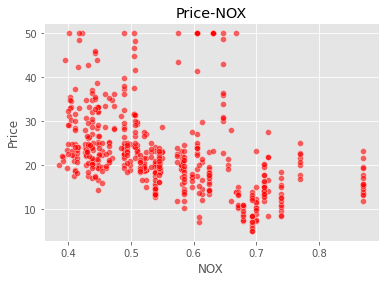

In [3]:
#观察数据分布,散点图
"""
seaborn.scatterplot(x=None, y=None, hue=None,
                    style=None, size=None, data=None, 
                    palette=None, hue_order=None, hue_norm=None,
                    sizes=None, size_order=None, size_norm=None, 
                    markers=True, style_order=None, x_bins=None,
                    y_bins=None, units=None, estimator=None, 
                    ci=95, n_boot=1000, alpha='auto', x_jitter=None,
                    y_jitter=None, legend='brief', ax=None, **kwargs)

"""
sns.scatterplot(x=boston_data['NOX'],y=boston_data['Price'],color='r',alpha=0.6)
plt.title("Price-NOX")
plt.show()

数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。

各个特征的相关解释：

   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

## 1.2 分类

iris数据集

Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度，4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
iris_data = pd.DataFrame(X,columns=features)
iris_data['target'] = y
iris_data.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

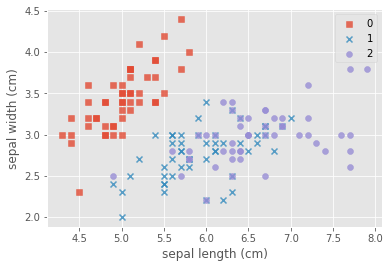

In [9]:
#可视化特征
marker = ['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],y =iris_data.loc[y==c,"sepal width (cm)"],alpha=0.8,label=c,marker=marker[c])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

每种不同的颜色和点的样式为一种类型的鸢尾花，数据集有三种不同类型的鸢尾花。因此因变量是一个类别变量，因此通过特征预测鸢尾花类别的问题是一个分类问题。

各个特征的相关解释：
   - sepal length (cm)：花萼长度(厘米)
   - sepal width (cm)：花萼宽度(厘米)
   - petal length (cm)：花瓣长度(厘米)
   - petal width (cm)：花瓣宽度(厘米)

## 1.3 无监督学习
https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

链接中的函数可生成数据集

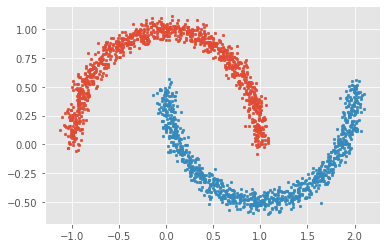

In [7]:
# 生成月牙型非凸集
from sklearn import datasets
x, y = datasets.make_moons(n_samples=2000, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

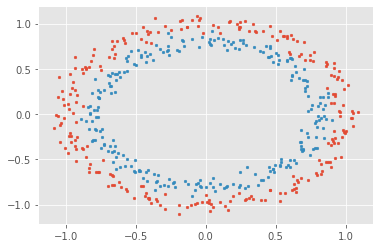

In [19]:
# 圆形
from sklearn import datasets
x, y = datasets.make_circles(n_samples=500, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

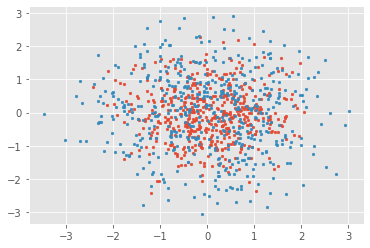

In [34]:
# 产生一个相似的二元分类数据集，有10个维度
from sklearn import datasets
x, y = datasets.make_hastie_10_2(n_samples=1000,random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

## 2. 使用sklearn构建完整的机器学习项目流程

- 明确项目任务：回归/分类
- 收集数据集并选择合适的特征。
- 选择度量模型性能的指标。
- 选择具体的模型并进行训练以优化模型。
- 评估模型的性能并调参。

### 2.1 使用sklearn构建回归项目

数据集：Boston房价  收集数据 选择特征

各个特征的相关解释：
   - CRIM：各城镇的人均犯罪率
   - ZN：规划地段超过25,000平方英尺的住宅用地比例
   - INDUS：城镇非零售商业用地比例
   - CHAS：是否在查尔斯河边(=1是)
   - NOX：一氧化氮浓度(/千万分之一)
   - RM：每个住宅的平均房间数
   - AGE：1940年以前建造的自住房屋的比例
   - DIS：到波士顿五个就业中心的加权距离
   - RAD：放射状公路的可达性指数
   - TAX：全部价值的房产税率(每1万美元)
   - PTRATIO：按城镇分配的学生与教师比例
   - B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
   - LSTAT：较低地位人口
   - Price：房价

In [43]:
from sklearn import datasets
boston = datasets.load_boston()       #返回一个类似字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

（2）选择度量模型性能的指标   损失函数

在这个案例中，选择MSE均方误差

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

metrics.explained_variance_score(y_true, …)

Explained variance regression score function.

metrics.max_error(y_true, y_pred)

max_error metric calculates the maximum residual error.

metrics.mean_absolute_error(y_true, y_pred, *)

Mean absolute error regression loss.

metrics.mean_squared_error(y_true, y_pred, *)

Mean squared error regression loss.

metrics.mean_squared_log_error(y_true, y_pred, *)

Mean squared logarithmic error regression loss.

metrics.median_absolute_error(y_true, y_pred, *)

Median absolute error regression loss.

metrics.mean_absolute_percentage_error(…)

Mean absolute percentage error regression loss.

metrics.r2_score(y_true, y_pred, *[, …])

R^2 (coefficient of determination) regression score function.

metrics.mean_poisson_deviance(y_true, y_pred, *)

Mean Poisson deviance regression loss.

metrics.mean_gamma_deviance(y_true, y_pred, *)

Mean Gamma deviance regression loss.

metrics.mean_tweedie_deviance(y_true, y_pred, *)

Mean Tweedie deviance regression loss.

（3）选择具体的模型并进行训练 

线性回归模型

一种回归模型，通过将输入特征进行线性组合输出连续值。

回归分析是一种预测性的建模技术，它研究的是因变量（目标）和自变量（特征）之间的关系。这种技术通常用于预测分析，时间序列模型以及发现变量之间的因果关系。通常使用曲线/线来拟合数据点，目标是使曲线到数据点的距离差异最小。而线性回归就是回归问题中的一种，线性回归假设目标值与特征之间线性相关，即满足一个多元一次方程。

$y_i$ = b+$w^Tx_i$

多元线性回归问题（multiple linear regression），线性约束由多个解释变量构成。

y=$b_0$+$w_1$$x_1$+$w_2$$x_2$+.....+$w_n$$x_n$

最小二乘估计

我们需要衡量真实值$y_i$与线性回归模型的预测值$w^Tx_i$之间的差距，在这里我们和使用二范数的平方和L(w)来描述这种差距


In [16]:
'''
linear_model.LinearRegression(*[, …])

Ordinary least squares Linear Regression.
'''
from sklearn import linear_model    #sklearn中的线性回归
lin_reg = linear_model.LinearRegression()   
lin_reg.fit(X,y)   #输入特征X和因变量y进行训练
print("模型系数:",lin_reg.coef_)      # 输出模型的系数
print("模型得分:",lin_reg.score(X,y)) #输出模型的决定系数R^2

模型系数: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
模型得分: 0.7406426641094095


- 线性回归的推广

因为模型的形式本身是线性的，无法表达数据中的非线性关系，需要推广线性回归模型使之推广后的模型更能表达非线性的关系。

(a) 多项式回归：        
   为了体现因变量和特征的非线性关系，一个很自然而然的想法就是将标准的线性回归模型：             
   $$
   y_i = w_0 + w_1x_i + \epsilon_i
   $$               
   换成一个多项式函数：          
   $$
   y_i = w_0 + w_1x_i + w_2x_i^2 + ...+w_dx_i^d + \epsilon
   $$  

   如果d取的越大，多项式曲线就会越光滑，置信区间会明显增大，导致稳定性下降。  

In [35]:
'''
多项式回归 PolynomialFeatures

sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C'):               
   - 参数：         
   degree：特征转换的阶数。                       
   interaction_onlyboolean：是否只包含交互项，默认False 。              
   include_bias：是否包含截距项，默认True。           
   order：str in {‘C’, ‘F’}, default ‘C’，输出数组的顺序。

   interaction_onlybool, default=False
If true, only interaction features are produced: features that are products of at most distinct input features
如果为true，则只生成交互特性：这些特性最多是不同输入特性的产物

'''

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [36]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [37]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

（b）广义可加模型(GAM)

广义可加模型GAM实际上是线性模型推广至非线性模型的一个框架，在这个框架中，每一个变量都用一个非线性函数来代替，但是模型本身保持整体可加性。

标准的线性回归模型：           
   $$
   y_i = w_0 + w_1x_{i1} +...+w_px_{ip} + \epsilon_i 
   $$                 
   GAM模型框架：                  
   $$
   y_i = w_0 + \sum\limits_{j=1}^{p}f_{j}(x_{ij}) + \epsilon_i
   $$            

In [42]:
from pygam import LinearGAM
gam = LinearGAM().fit(boston_data[boston.feature_names],y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    103.2423
Link Function:                     IdentityLink Log Likelihood:                                 -1589.7653
Number of Samples:                          506 AIC:                                             3388.0152
                                                AICc:                                            3442.7649
                                                GCV:                                               13.7683
                                                Scale:                                              8.8269
                                                Pseudo R-Squared:                                   0.9168
Feature Function                  Lam

 - **回归树：**                                   
   基于树的回归方法主要是依据分层和分割的方式将特征空间划分为一系列简单的区域。对某个给定的待预测的自变量，用他所属区域中训练集的平均数或者众数对其进行预测。由于划分特征空间的分裂规则可以用树的形式进行概括，因此这类方法称为决策树方法。决策树由结点(node)和有向边(diredcted edge)组成。结点有两种类型：内部结点(internal node)和叶结点(leaf node)。内部结点表示一个特征或属性，叶结点表示一个类别或者某个值。区域$R_1,R_2$等称为叶节点，将特征空间分开的点为内部节点。  

In [45]:
from sklearn.tree import DecisionTreeRegressor    
reg_tree = DecisionTreeRegressor(criterion = "mse",min_samples_leaf = 5)
reg_tree.fit(X,y)
reg_tree.score(X,y)

0.9376307599929274